In [1]:
#20171002
#Christina Loniewski

In [1]:
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import numpy as np
import pylab
pylab.rcParams['figure.figsize']=10,10

In [2]:
def FindMeanSumofPhotons_binom(filename, qm_efficiency):
    
#Apply binomial straight Some% multiplication
#Print sum of photons for each event. Print the mean and standard deviation of these sums.
    print("binomial applied\nquantum efficiency is ", qm_efficiency)
    pmt_array = np.genfromtxt(filename,delimiter=',')
    binom_array = np.zeros(shape=(np.shape(pmt_array)[0],np.shape(pmt_array)[1]))
    for i in range (0,np.shape(pmt_array)[0]):
        for j in range(0,np.shape(pmt_array)[1]): 
            y = pmt_array[i][j]
            x = np.random.binomial(y,qm_efficiency)
            binom_array[i][j]=x
    #all    
    totalphotonsforeachevent_qm = np.sum(binom_array[:,:-1],axis=1)
    mean_qm=np.mean(totalphotonsforeachevent_qm) #Some% probability detected
    stddev_qm=np.std(totalphotonsforeachevent_qm)
    print("all:\t\t",round(mean_qm,2),"+/-",round(stddev_qm,2))
    #top
    totalphotonsforeachevent_qm = np.sum(binom_array[:,:253],axis=1)
    mean_qm_top=np.mean(totalphotonsforeachevent_qm) #30% probability detected
    stddev_qm_top=np.std(totalphotonsforeachevent_qm)
    print("top array:\t",round(mean_qm_top,2),"+/-",round(stddev_qm_top,2))  
    #bottom
    pmt_array_bottom = np.genfromtxt(filename,delimiter=',')
    totalphotonsforeachevent_qm = np.sum(binom_array[:,300:-1],axis=1)
    mean_qm_bottom=np.mean(totalphotonsforeachevent_qm) #30% probability detected
    stddev_qm_bottom=np.std(totalphotonsforeachevent_qm)
    print("bottom array:\t",round(mean_qm_bottom,2),"+/-",round(stddev_qm_bottom,2)) 
    print("\n")
    return mean_qm,stddev_qm

In [18]:
FindMeanSumofPhotons_binom('/home/christina/LZSim/bin_files/20171205_1liquidelectron_Random_10000events_z145p6cm_543696148.csv',0.3)

binomial applied
quantum efficiency is  0.3
all:		 129.38 +/- 11.48
top array:	 86.28 +/- 9.25
bottom array:	 43.1 +/- 6.67




(129.38341237009382, 11.482400816163901)

In [3]:
def GetNumberOfPmtsAboveThreshold(pmt_array,threshold):
#Takes a 2-D array and n-phe threshold, and spits out 2 things: 
#events that have N or more PMTS that exceed n-phe threshold, and bin positions
    pmt_greater_than_Nphe = pmt_array>threshold #Creates a 2-D True-False array
    total_pmtsper_event_greater_than_Nphe = np.sum(pmt_greater_than_Nphe,axis=1) 
    vals=np.zeros(10)
    for numPmtsRequired in range(0,10):
        isItaHit = total_pmtsper_event_greater_than_Nphe>=numPmtsRequired 
        totalnumberofhits = np.sum(isItaHit,axis=0)   
        vals[numPmtsRequired]=totalnumberofhits
    bins=[0,1,2,3,4,5,6,7,8,9]
    return vals,bins               

In [4]:
def WilsonScoreInterval(vals_array,totalnumberofevents):
    efficiency_array=np.zeros(np.shape(vals_array)[0])
    efficiency_err_array=np.zeros(np.shape(vals_array)[0])
    for i in range(len(vals_array)):
        confidence_interval = .95
        z = 1- (1-confidence_interval)/2
        n=totalnumberofevents
        n_s=vals_array[i]
        p_hat = n_s/n 
    
        p=(p_hat+z**2/(2*n))/(1+z**2/n)
        p_err=z/(1+z**2/n)*np.sqrt((p_hat*(1-p_hat)/n)+(z**2/(4*n**2)))
        efficiency_array[i]=p*100
        efficiency_err_array[i]=p_err*100
    
    return efficiency_array, efficiency_err_array

In [6]:
def MakeTriggerPlotsSimple(filename,figure1_filename,figure2_filename,threshold,threshold2,threshold3,title,legend_loc):
#This takes a csv file and an n-phe trigger level, and spits out two plots.
    qm_efficiency=0.3
    pmt_array = np.genfromtxt(filename,delimiter=',') #This is a 2-D array.
    binom_array = np.zeros(shape=(np.shape(pmt_array)[0],np.shape(pmt_array)[1]))
    for i in range (0,np.shape(pmt_array)[0]):
        for j in range(0,np.shape(pmt_array)[1]): 
            y = pmt_array[i][j]
            x = np.random.binomial(y,qm_efficiency)
            binom_array[i][j]=x  
    pmt_array_30 = binom_array[:,:-1] #Applies 30% probability across the board.
    #This calls a function, which takes an array and n-phe threshold, and spits out 2 things: 
    #the number of events that have N or more PMTs that exceed n-phe threshold, and bin locations.
    vals_new_center_top_1,bins_center_top_1 = GetNumberOfPmtsAboveThreshold(pmt_array_30[:,:260],threshold)
    vals_new_center_top_2,bins_center_top_2 = GetNumberOfPmtsAboveThreshold(pmt_array_30[:,:260],threshold2)
    vals_new_center_top_3,bins_center_top_3 = GetNumberOfPmtsAboveThreshold(pmt_array_30[:,:260],threshold3)

    x1=bins_center_top_1
    y1=WilsonScoreInterval(vals_new_center_top_1,np.shape(pmt_array)[0])[0]
    err1=WilsonScoreInterval(vals_new_center_top_1,np.shape(pmt_array)[0])[1]
    x2=bins_center_top_2
    y2=WilsonScoreInterval(vals_new_center_top_2,np.shape(pmt_array)[0])[0]
    err2=WilsonScoreInterval(vals_new_center_top_2,np.shape(pmt_array)[0])[1]
    x3=bins_center_top_3
    y3=WilsonScoreInterval(vals_new_center_top_3,np.shape(pmt_array)[0])[0]
    err3=WilsonScoreInterval(vals_new_center_top_3,np.shape(pmt_array)[0])[1]

    #Create error bars. Change this to 95% confidence interval!!!!!
    plt.errorbar(x1,y1,yerr=err1,
                ls='--',marker='o',markersize=5,color='blue',
                label='Top PMTs 3-phe')
    plt.errorbar(x2,y2,yerr=err2,
                ls='-',marker='o',markersize=5,color='red',
                label='Top PMTs 4-phe')
    plt.errorbar(x3,y3,yerr=err3,
                ls=':',marker='o',markersize=5,color='green',
                label='Top PMTs 5-phe')

    plt.xlabel("Number of PMTs above \nan N-phe threshold" ,fontsize=25)       
    #Creates figure: Percent of events captured as a function of the #PMTs at or above a 3phe threshold.
    plt.ylabel("Trigger efficiency (%)",fontsize=25)
    plt.title(title,fontsize=25)
    plt.tick_params(axis='both',which='major',labelsize=25,width=2,size=10,direction='in')
    
    
    
    
    
    plt.legend(loc=legend_loc,fontsize=25)
    
    
    
    
    plt.axis([-0.1,10.1,-1,110])
    plt.savefig(figure1_filename,bbox_inches='tight')
    plt.show()
    plt.close()
    pmt_greater_than_3phe = pmt_array_30>threshold
    total_pmtsper_event_greater_than_3phe = np.sum(pmt_greater_than_3phe,axis=1)
    event_size = np.sum(pmt_array_30,axis=1) #This is a 1-D array, that contains the total photons detected for each event.
    #The above can be decimals because of the 30% probability applied. May consider changing.
    print(np.shape(event_size))
        
    plt.plot(total_pmtsper_event_greater_than_3phe,event_size,
            marker='o',ls='none',markersize=2)
    plt.xlabel("Number of PMTs at \nan N-phe threshold",fontsize=25)
    #Creates scatterplot:Number of detected photons versus the #PMTs at or above a 3phe threshold. 
    plt.ylabel("Number of Detected Photons",fontsize=25)
    plt.tick_params(axis='both',which='major',labelsize=25,width=2,size=10,direction='in')
    plt.axis([0,10,100,180])
    plt.savefig(figure2_filename,bbox_inches='tight')
    #plt.show()
    plt.close()
    
    print()

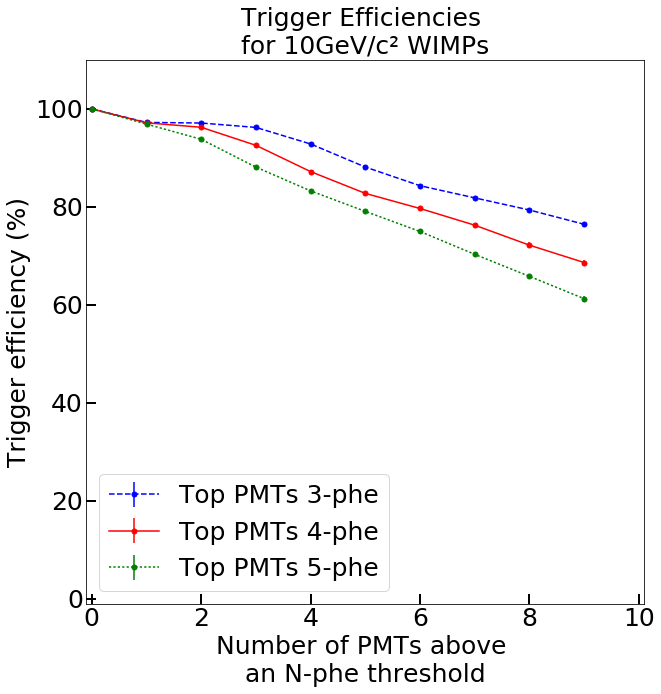

(6451,)



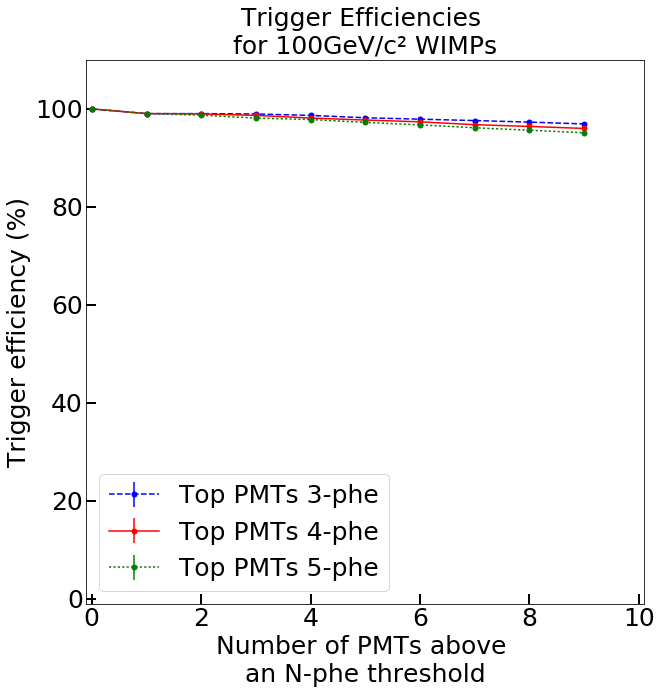

(8568,)



In [7]:
#WIMPs#just S2 #20180410
title='Trigger Efficiencies \nfor 10GeV/c'+chr(0x00B2)+' WIMPs'; legend_loc='lower left'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/20180410_wimp_10filescombined_10Gev_phot_S2.csv',
                      '/home/christina/LZSim/Figures/20180410_wimp_10Gev_triggerEfficiency.png',
                      '/home/christina/LZSim/Figures/20180410_wimp_10Gev_triggerEfficiency2.png',3,4,5,title,legend_loc)

title='Trigger Efficiencies \nfor 100GeV/c'+chr(0x00B2)+' WIMPs'; legend_loc='lower left'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/20180410_wimp_10filescombined_100Gev_phot_S2.csv',
                      '/home/christina/LZSim/Figures/20180410_wimp_100Gev_triggerEfficiency.png',
                      '/home/christina/LZSim/Figures/20180410_wimp_100Gev_triggerEfficiency2.png',3,4,5,title,legend_loc)
                       


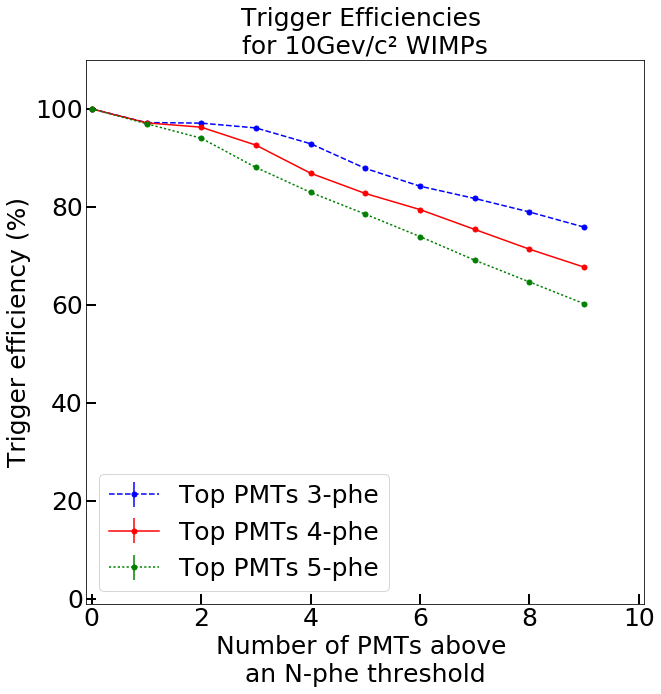

(23776,)



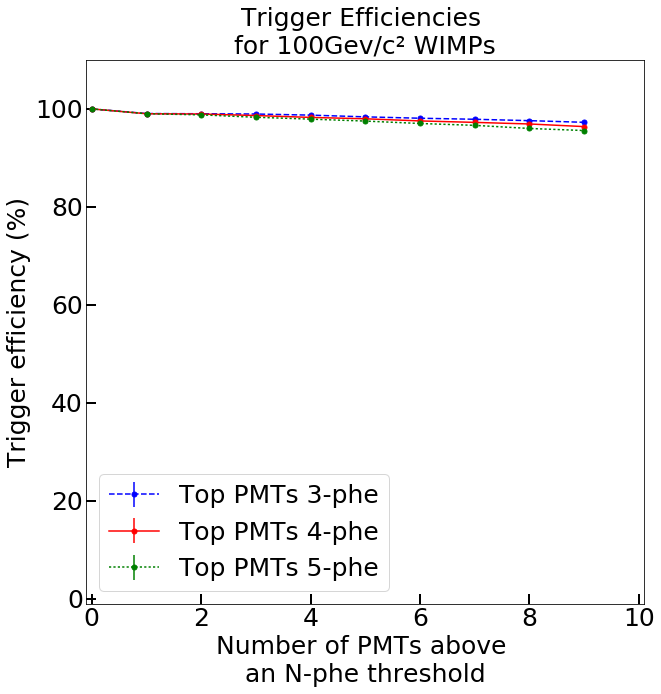

(7086,)



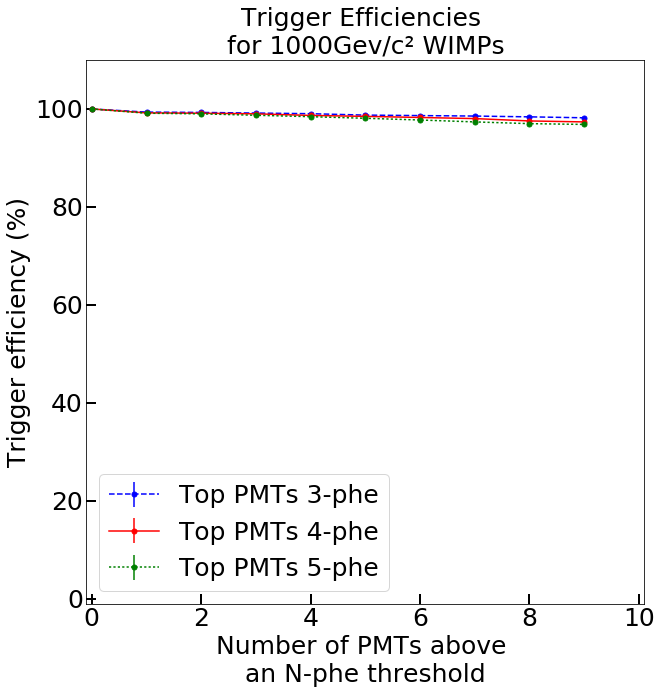

(3099,)



In [98]:
#WIMPs
title='Trigger Efficiencies \nfor 10Gev/c'+chr(0x00B2)+' WIMPs'; legend_loc='lower left'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/WIMPs_10Gev/20180221_wimp_9filescombined_10Gev_phot.csv',
                      '/home/christina/LZSim/Figures/20180305_wimp_10Gev_triggerEfficiency.png',
                      '/home/christina/LZSim/Figures/20180305_wimp_10Gev_triggerEfficiency2.png',3,4,5,title,legend_loc)

title='Trigger Efficiencies \nfor 100Gev/c'+chr(0x00B2)+' WIMPs'; legend_loc='lower left'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/WIMPs_100Gev/20180221_wimp_2filescombined_100Gev_phot.csv',
                      '/home/christina/LZSim/Figures/20180305_wimp_100Gev_triggerEfficiency.png',
                      '/home/christina/LZSim/Figures/20180305_wimp_100Gev_triggerEfficiency2.png',3,4,5,title,legend_loc)
                       
title='Trigger Efficiencies \nfor 1000Gev/c'+chr(0x00B2)+' WIMPs'; legend_loc='lower left'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/WIMPs_1000Gev/20180221_wimp_9filescombined_1000Gev_phot.csv',
                      '/home/christina/LZSim/Figures/20180305_wimp_1000Gev_triggerEfficiency.png',
                      '/home/christina/LZSim/Figures/20180305_wimp_1000Gev_triggerEfficiency2.png',3,4,5,title,legend_loc)

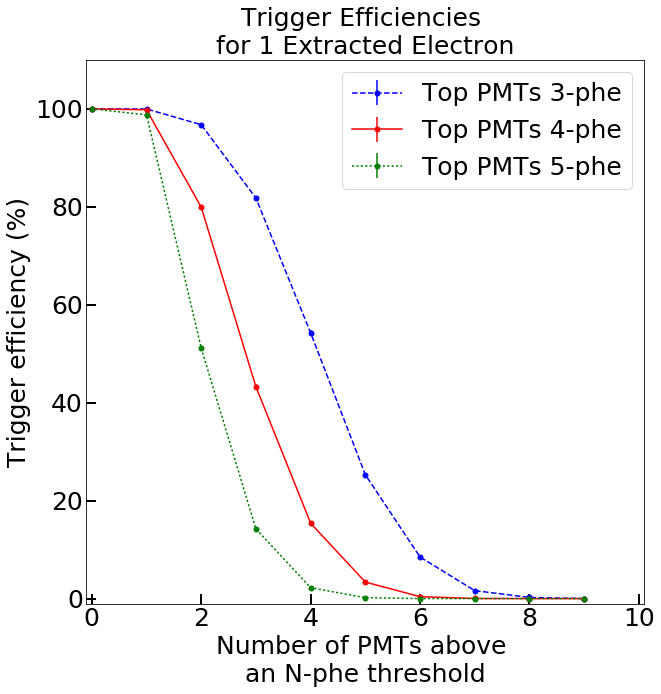

(9911,)



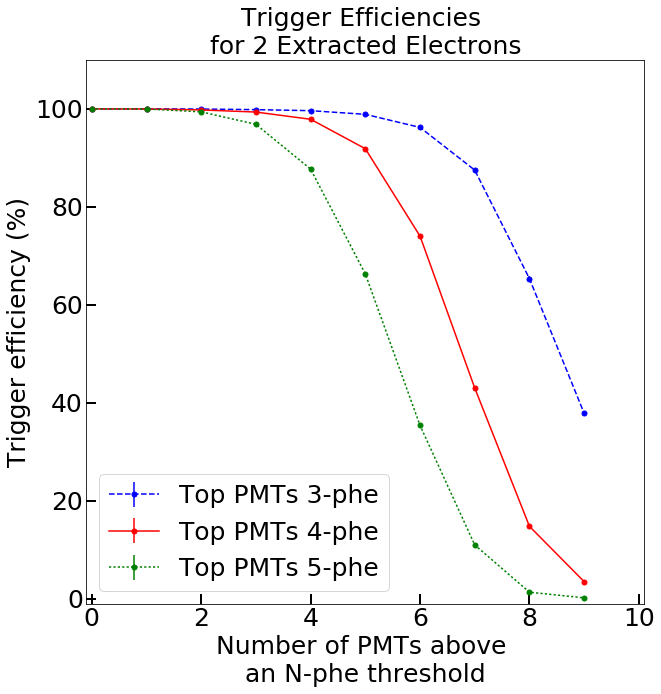

(9915,)



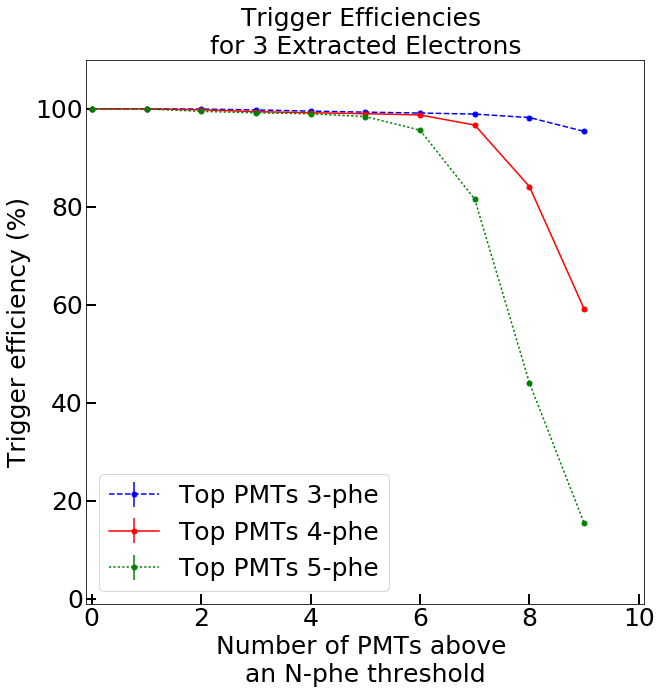

(9914,)



In [99]:
#Number of Liquid Electrons
title='Trigger Efficiencies \nfor 1 Extracted Electron'; legend_loc='upper right'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/NumberLiquidElectrons/20171205_1liquidelectron_Random_10000events_z145p6cm_543696148.csv',
                      '/home/christina/LZSim/Figures/20180305_1liquidelectron_random.png',
                      '/home/christina/LZSim/Figures/test2.png',3,4,5,title,legend_loc)
title='Trigger Efficiencies \nfor 2 Extracted Electrons'; legend_loc='lower left'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/NumberLiquidElectrons/20171121_2liquidelectrons_Random_10000events_z145p6cm_2046989382.csv',
                      '/home/christina/LZSim/Figures/20180305_2liquidelectrons_random.png',
                        '/home/christina/LZSim/Figures/test2.png',3,4,5,title,legend_loc)   
title='Trigger Efficiencies \nfor 3 Extracted Electrons'; legend_loc='lower left'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/NumberLiquidElectrons/20171121_3liquidelectrons_Random_10000events_z145p6cm_859809301.csv',
                      '/home/christina/LZSim/Figures/20180305_3liquidelectrons_random.png',
                      '/home/christina/LZSim/Figures/test2.png',3,4,5,title,legend_loc)            

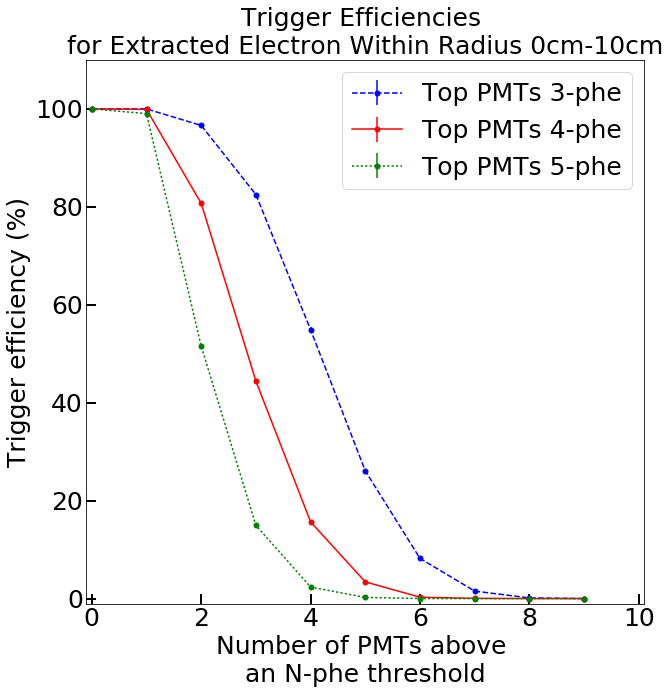

(9917,)



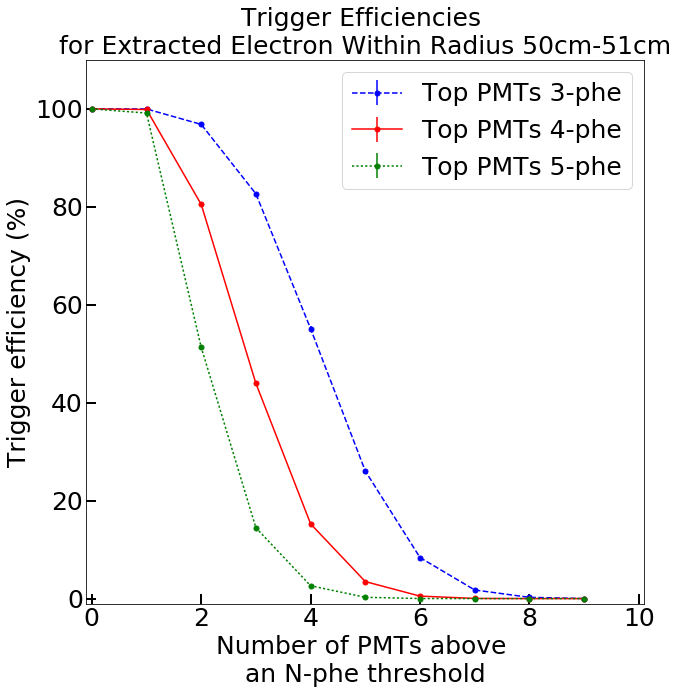

(9918,)



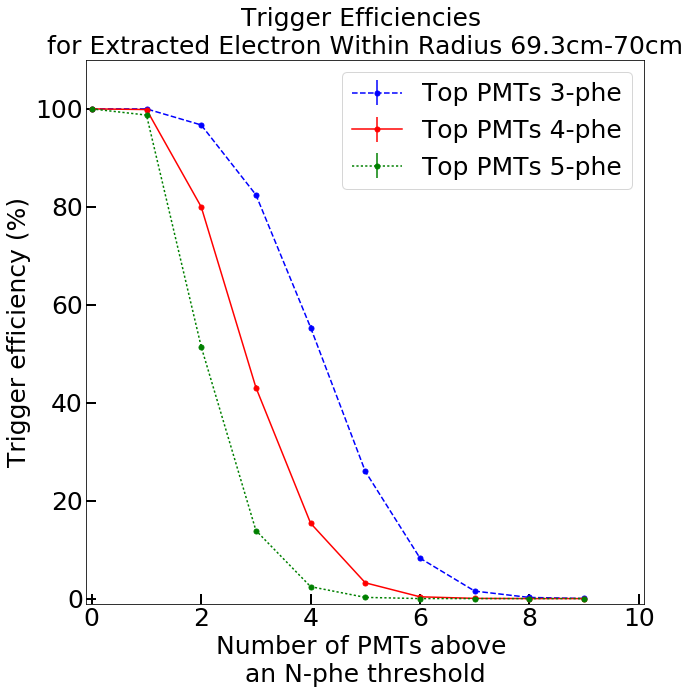

(9907,)



In [100]:
#Rings
title='Trigger Efficiencies \nfor Extracted Electron Within Radius 0cm-10cm'; legend_loc='upper right'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/Rings_equalarea/20171110_Ring0_0cm_10cm_Random_10000events_z145p6cm1729418141_pmt_phot.csv',
                      '/home/christina/LZSim/Figures/20180305_ring_0cm_10cm_random.png',
                      '/home/christina/LZSim/Figures/test2.png',3,4,5,title,legend_loc)
title='Trigger Efficiencies \nfor Extracted Electron Within Radius 50cm-51cm'; legend_loc='upper right'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/Rings_equalarea/20171115_Ring25_50cm_51cm_Random_10000events_z145p6cm433973049.csv',
                      '/home/christina/LZSim/Figures/20180305_ring_50cm_51cm_random.png',
                        '/home/christina/LZSim/Figures/test2.png',3,4,5,title,legend_loc)   
title='Trigger Efficiencies \nfor Extracted Electron Within Radius 69.3cm-70cm'; legend_loc='upper right'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/Rings_equalarea/20171113_Ring48_69p3cm_70cm_Random_10000events_z145p6cm893866138.csv',
                      '/home/christina/LZSim/Figures/20180305_ring_69p3cm_70cm_random.png',
                      '/home/christina/LZSim/Figures/test2.png',3,4,5,title,legend_loc)    

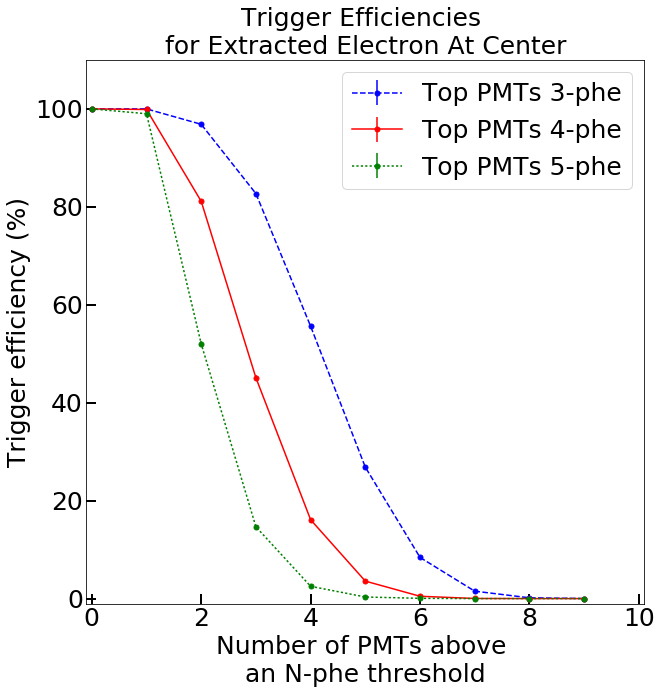

(9924,)



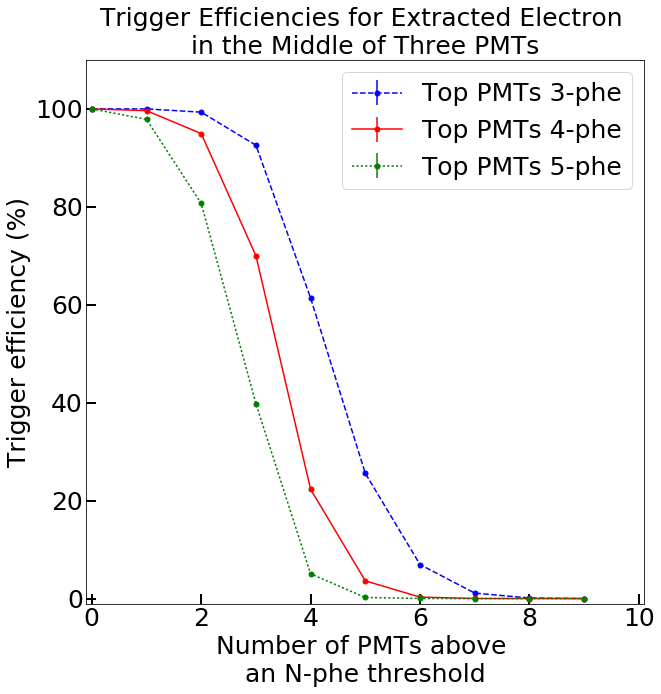

(9918,)



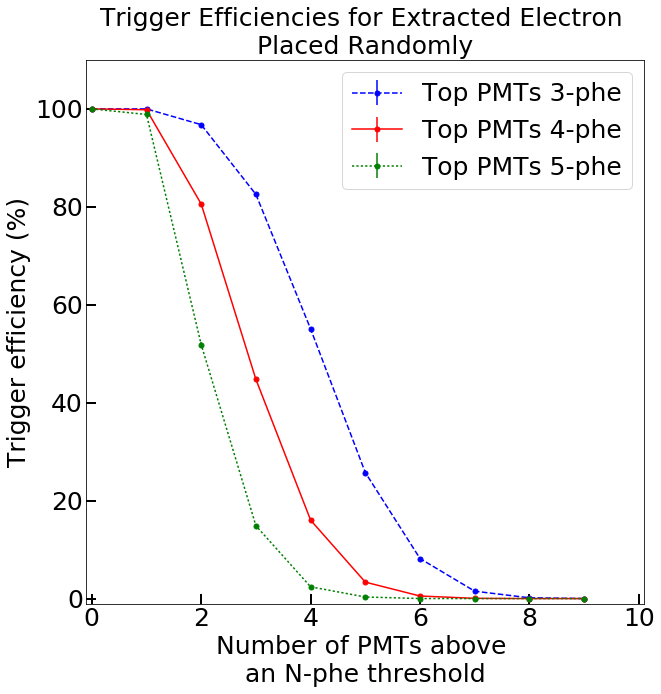

(9911,)



In [94]:
#Center, Bet3PMTs, Random
title='Trigger Efficiencies \nfor Extracted Electron At Center'; legend_loc='upper right'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/Center/20180228_Center_2filescombined_10000events_z1456mm_photocathode.csv',
                      '/home/christina/LZSim/Figures/20180305_Center.png',
                      '/home/christina/LZSim/Figures/test.png',3,4,5,title,legend_loc)
title='Trigger Efficiencies for Extracted Electron \nin the Middle of Three PMTs'; legend_loc='upper right'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/Bet3PMTs/20180228_Bet3pmts_2filescombined_10000events_z1456mm_photocathode.csv',
                      '/home/christina/LZSim/Figures/20180305_Bet3PMTs.png',
                        '/home/christina/LZSim/Figures/test2.png',3,4,5,title,legend_loc)   
title='Trigger Efficiencies for Extracted Electron \nPlaced Randomly'; legend_loc='upper right'
MakeTriggerPlotsSimple('/home/christina/LZSim/bin_files/NumberLiquidElectrons/20171205_1liquidelectron_Random_10000events_z145p6cm_543696148.csv',
                      '/home/christina/LZSim/Figures/20180305_Random.png',
                      '/home/christina/LZSim/Figures/test2.png',3,4,5,title,legend_loc)            

In [72]:
#WIMPs

filename1 = '/home/christina/LZSim/bin_files/WIMPs_10Gev/20180221_wimp_9filescombined_10Gev_phot.csv'
qm_eff = .30
FindMeanSumofPhotons_binom(filename1,qm_eff) 
#ERRORS are not correct. this is a half gaussian.

filename1 = '/home/christina/LZSim/bin_files/WIMPs_100Gev/20180221_wimp_2filescombined_100Gev_phot.csv'
qm_eff = .30
FindMeanSumofPhotons_binom(filename1,qm_eff)

filename1 = '/home/christina/LZSim/bin_files/WIMPs_1000Gev/20180221_wimp_9filescombined_1000Gev_phot.csv'
qm_eff = .30
FindMeanSumofPhotons_binom(filename1,qm_eff)



binomial applied
quantum efficiency is  0.3
all:		 723.21 +/- 636.65
top array:	 492.18 +/- 432.96
bottom array:	 231.03 +/- 204.63


binomial applied
quantum efficiency is  0.3
all:		 6417.95 +/- 5286.89
top array:	 4333.66 +/- 3589.64
bottom array:	 2084.29 +/- 1701.77


binomial applied
quantum efficiency is  0.3
all:		 9446.82 +/- 7488.5
top array:	 6302.68 +/- 5085.82
bottom array:	 3144.14 +/- 2412.2




(9446.8215553404316, 7488.5036545124531)